In [ ]:
import pandas

assets = pandas.read_csv("data/assets.csv")
assets = assets.sort_values("inventories")

display(assets)


On Desai pg 57, an equation for operating cash flow is provided.

Net Profit + Depreciation and Amortization - increases in accounts receivable - increases in inventory + increases in unearned revenut + increases in accounts payable

To understand this, think about what it's trying to do. It is trying to remove all the non-cash transactions from net profit. 

* Changes to accounts receivable and payable are not cash transactions. However, the cost of goods sold is not concerned with when money exchanges hands. 
  * Supplies arrive and their value is added to inventory (Not a cash transaction)
    1. Accounts Payable (a liability) is increased and inventory (an asset) is increased.
  * The supply is paid for. (Cash transaction)
    2. Accounts payable (a liability) is decreased and cash (an asset) is decreased.
  * The product is shipped.
    3. Accounts receivable (an asset) is increased and inventory (an asset) is decreased.

    
Net Profit = Revenue - Costs - Expenses

Costs = Starting Inventory + Purchases - Ending Inventory

Revenue is recognized when the product is received, not when it is paid for. A simple example would be shipping one product to a customer but not receiving payment for it yet. Then there is no cash flow.

**Inventory can increase or decrease without an accompanying cash flow.**

In [ ]:
%load_ext autoreload
%autoreload 2

from datetime import datetime, timedelta, date
from bizpy.finance import Transaction, Account, Business

business = Business()

business.raise_equity(1000, 10000, datetime.now())
business.purchase_inventory(100, datetime.now(), timedelta(days=30))
business.sell_on_terms(2, datetime.today(), timedelta(days=30))

business.process()

print(business._ledger)





$Total = n_{adults} * p_{adult} + n_{kids} * p_{kid}$

$p_{kid} = k * p_{adult}$

$Total = n_a * p_a + n_k * k * p_a$

$T = p_a (n_a + kn_k)$

$p_a = T / (n_a + k$

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

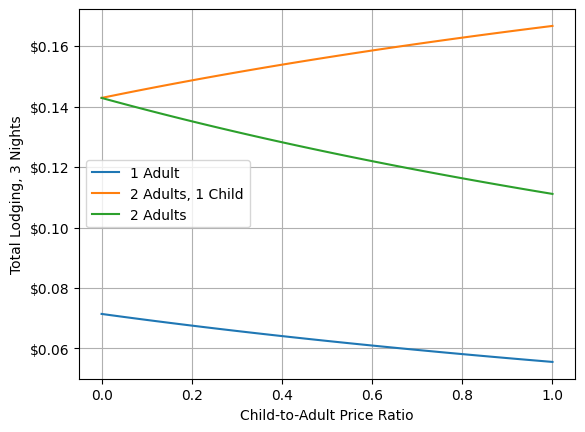

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# total = 3334.61 + 3663.06
total = 3663.06
# total = 3334.61
num_adults = 14
num_kids = 4

def calculate_prices(k, num_adults = 14, num_children = 4, total_cost = 1):
    price_per_adult = total_cost / (num_adults + k * num_children)
    price_per_child = price_per_adult * k

    return price_per_adult, price_per_child

k = np.linspace(0, 1, 101)

price_per_adult, price_per_child = calculate_prices(k)

fig, ax = plt.subplots()

ax.plot(k, price_per_adult, label="1 Adult")
ax.plot(k, 2 * price_per_adult + price_per_child, label="2 Adults, 1 Child")
ax.plot(k, 2 * price_per_adult, label="2 Adults")
ax.set_xlabel("Child-to-Adult Price Ratio")
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_ylabel("Total Lodging, 3 Nights")
ax.legend()
ax.grid()

options = []

for k in (0, .25, 0.5, 0.75, 1.0):
    price_per_adult, price_per_child = calculate_prices(k)
    option = {
        "Child-to-Adult Ratio": k,
        "Price per Adult": price_per_adult,
        "Price per Child": price_per_child,
        "Family Cost": 2 * price_per_adult + price_per_child,
        "Couple Cost": 2 * price_per_adult,
        "Sean Cost": price_per_adult
    }

    options.append(option)

    
df = pd.DataFrame(options)

style = df.style
style = style.format("$ {0:.2f}")
style = style.format("{0:.2f}", subset="Child-to-Adult Ratio")
style = style.hide()


display(style)


In [61]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.dates

import pandas as pd

from bizpy.fred import FRED


api_key = "ec42841cf6b18906eb23d716f8df0471"
api = FRED(api_key)
df = pd.DataFrame(api.get_releases()["releases"])
display(df)
# df = pd.DataFrame(api.get_release_series(14)["seriess"])
# display(df)
# api.get_category_children(46)


# # df = pd.DataFrame(api.get_category_series(32255)["seriess"])
# # display(df)
# df = api.get_series_observations("mortgage30us")

# fig, ax = plt.subplots()
# ax.grid()
# ax.plot(df["date"], df["value"])

# ax.hlines(df["value"].mean(), min(df["date"]), max(df["date"]), color="red", linestyle="dashed")

# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# ax.tick_params(axis='x', labelrotation=45)

# fig.show()

# api.get_releases()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,id,realtime_start,realtime_end,name,press_release,link,notes
0,9,2024-06-07,2024-06-07,Advance Monthly Sales for Retail and Food Serv...,True,http://www.census.gov/retail/,The U.S. Census Bureau conducts the Advance Mo...
1,10,2024-06-07,2024-06-07,Consumer Price Index,True,http://www.bls.gov/cpi/,NaN
2,11,2024-06-07,2024-06-07,Employment Cost Index,True,http://www.bls.gov/ncs/ect,NaN
3,13,2024-06-07,2024-06-07,G.17 Industrial Production and Capacity Utiliz...,True,http://www.federalreserve.gov/releases/g17/,"For questions on the data, please contact the ..."
4,14,2024-06-07,2024-06-07,G.19 Consumer Credit,True,http://www.federalreserve.gov/releases/g19/,"For questions on the data, please contact the ..."
...,...,...,...,...,...,...,...
308,571,2024-06-07,2024-06-07,Senior Credit Officer Opinion Survey on Dealer...,True,https://www.federalreserve.gov/data/scoos.htm,The Senior Credit Officer Opinion Survey on De...
309,605,2024-06-07,2024-06-07,Underlying Inflation Gauge (UIG),True,https://www.newyorkfed.org/research/policy/und...,The Underlying Inflation Gauge is a monthly es...
310,637,2024-06-07,2024-06-07,Wage Growth Tracker,True,https://www.atlantafed.org/chcs/wage-growth-tr...,The Atlanta Fed&#39;s Wage Growth Tracker is a...
311,670,2024-06-07,2024-06-07,Macroeconomic Uncertainty Index for United States,True,https://www.sydneyludvigson.com/macro-and-fina...,NaN


/tmp/ipykernel_31035/63744013.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


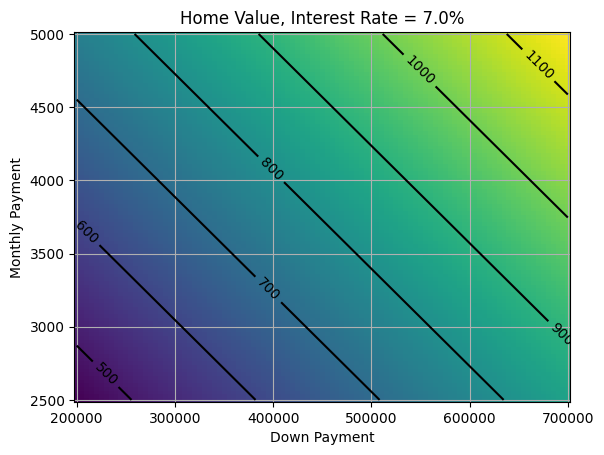

In [1]:
%load_ext autoreload
%autoreload 2

import itertools
import matplotlib.pyplot as plt
import moneypy.mortgage as mortgage
import numpy as np


interest_rate = 0.070
tax_rate = .0175
insurance_rate = .0035
monthly_payments = np.linspace(2500, 5000, 101)
down_payments = np.linspace(200e3, 700e3, 101)


home_values = [
    mortgage.calc_home_value(
        down_payment=down_payments,
        monthly_payment=monthly_payment,
        interest_rate=interest_rate,
        tax_rate=tax_rate,
        insurance_rate=insurance_rate
    ) / 1e3 for monthly_payment in monthly_payments
]

fig, ax = plt.subplots()
ax.set_title(f"Home Value, Interest Rate = {interest_rate * 100:.1f}%")
ax.set_xlabel("Down Payment")
ax.set_ylabel("Monthly Payment")
mesh = ax.pcolormesh(down_payments, monthly_payments, home_values)
contour = ax.contour(down_payments, monthly_payments, home_values, np.linspace(500, 1100, 7), colors="k")

ax.clabel(contour)

ax.grid()
fig.show()
    

